In [1]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from datetime import date, timedelta

In [2]:
df = pd.read_csv("dataset (MSFT).csv")
print("Number of rows and columns:", df.shape)
# df.tail(5)

Number of rows and columns: (7779, 7)


In [3]:
df = df.tail(20)
print(df)

                     Unnamed: 0        Open        High         Low  \
7759  2022-10-14 15:40:00-04:00  230.029999  230.080002  229.970001   
7760  2022-10-14 15:41:00-04:00  229.979996  229.979996  229.740005   
7761  2022-10-14 15:42:00-04:00  229.869995  230.059998  229.750000   
7762  2022-10-14 15:43:00-04:00  229.942398  230.009995  229.770004   
7763  2022-10-14 15:44:00-04:00  229.910004  230.080002  229.880005   
7764  2022-10-14 15:45:00-04:00  230.029999  230.029999  229.720001   
7765  2022-10-14 15:46:00-04:00  229.729996  229.860001  229.684998   
7766  2022-10-14 15:47:00-04:00  229.779999  229.800003  229.490005   
7767  2022-10-14 15:48:00-04:00  229.500000  229.619995  229.399994   
7768  2022-10-14 15:49:00-04:00  229.589996  229.820007  229.470001   
7769  2022-10-14 15:50:00-04:00  229.759995  230.139999  229.759995   
7770  2022-10-14 15:51:00-04:00  230.089996  230.130005  229.779999   
7771  2022-10-14 15:52:00-04:00  229.779999  230.029999  229.750000   
7772  

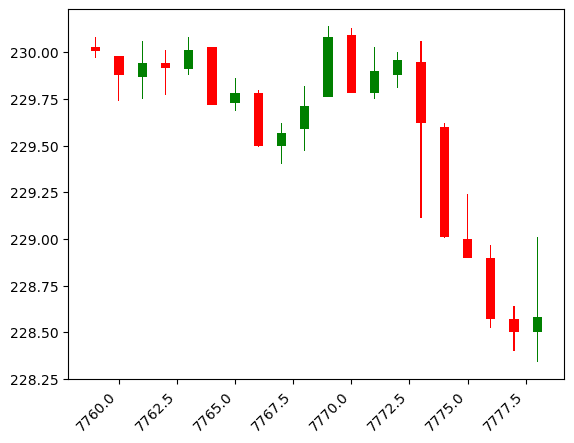

In [4]:
plt.figure()

#define width of candlestick elements
width = .4
width2 = .05

#define up and down prices
up = df[df.Close>=df.Open]
down = df[df.Close<df.Open]

#define colors to use
col1 = 'green'
col2 = 'red'

#plot up prices
plt.bar(up.index,up.Close-up.Open,width,bottom=up.Open,color=col1)
plt.bar(up.index,up.High-up.Close,width2,bottom=up.Close,color=col1)
plt.bar(up.index,up.Low-up.Open,width2,bottom=up.Open,color=col1)

#plot down prices
plt.bar(down.index,down.Close-down.Open,width,bottom=down.Open,color=col2)
plt.bar(down.index,down.High-down.Open,width2,bottom=down.Open,color=col2)
plt.bar(down.index,down.Low-down.Close,width2,bottom=down.Close,color=col2)

#rotate x-axis tick labels
plt.xticks(rotation=45, ha='right')

#display candlestick chart
plt.show()